In [75]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#data = pd.read_csv('wine.data', header=None)
data = np.genfromtxt('wine.data', delimiter=',')
X = data[:, 1:]
y = data[:, 0].astype(int)
print(data)
print(X)
print(y)

[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

Метод k ближайших соседей реализован в классе sklearn.neighbors.KNeighborsClassifier. Основным параметром является n_neighbors, который задает число соседей для построения прогноза.

Вам понадобится производить кросс-валидацию по блокам. Кросс-валидация заключается в разделении выборки на m непересекающихся блоков примерно одинакового размера, после чего выполняется m шагов. На i-м шаге i-й блок выступает в качестве тестовой выборки, объединение всех остальных блоков — в качестве обучающей выборки. Соответственно, на каждом шаге алгоритм обучается на некоторой обучающей выборке, после чего вычисляется его качество на тестовой выборке. После выполнения m шагов мы получаем m показателей качества, усреднение которых и дает оценку кросс-валидации. 

Технически кросс-валидация проводится в два этапа:

    Создается генератор разбиений sklearn.model_selection.KFold, который задает набор разбиений на обучение и валидацию. Число блоков в кросс-валидации определяется параметром n_splits. Обратите внимание, что порядок следования объектов в выборке может быть неслучайным, это может привести к смещенности кросс-валидационной оценки. Чтобы устранить такой эффект, объекты выборки случайно перемешивают перед разбиением на блоки. Для перемешивания достаточно передать генератору KFold параметр shuffle=True.

    Вычислить качество на всех разбиениях можно при помощи функции sklearn.model_selection.cross_val_score. В качестве параметра estimator передается классификатор, в качестве параметра cv — генератор разбиений с предыдущего шага. С помощью параметра scoring можно задавать меру качества, по умолчанию в задачах классификации используется доля верных ответов (accuracy). Результатом является массив, значения которого нужно усреднить.

Приведение признаков к одному масштабу можно делать с помощью функции sklearn.preprocessing.scale, которой на вход необходимо подать матрицу признаков и получить масштабированную матрицу, в которой каждый столбец имеет нулевое среднее значение и единичное стандартное отклонение.

В этом задании вам нужно подобрать оптимальное значение k для алгоритма kNN. Будем использовать набор данных Wine, где требуется предсказать сорт винограда, из которого изготовлено вино, используя результаты химических анализов.

    Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).

    Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

    Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации.

    Какое значение k получилось оптимальным после приведения признаков к одному масштабу? Приведите ответы на вопросы 3 и 4. Помогло ли масштабирование признаков?

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.5. При необходимости округляйте дробную часть до двух знаков.

In [9]:
KFold?

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
kf.get_n_splits(X)

5

In [23]:
print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [24]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8  10  11  13  14  17  20  21  22  23
  25  26  27  28  32  33  34  35  36  37  38  39  40  43  44  46  47  48
  49  50  51  52  53  54  56  57  58  59  61  62  63  64  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  83  84  85  86  87  88  89  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110
 112 115 116 120 121 122 123 124 125 126 127 129 130 131 132 133 134 135
 136 137 138 139 142 143 144 146 147 148 149 151 152 153 154 155 156 157
 158 159 160 161 162 163 165 166 167 168 170 172 173 175 176 177] TEST: [  9  12  15  16  18  19  24  29  30  31  41  42  45  55  60  65  66  67
  82  90 109 111 113 114 117 118 119 128 140 141 145 150 164 169 171 174]
TRAIN: [  0   1   3   5   7   8   9  10  12  13  14  15  16  17  18  19  20  21
  23  24  25  28  29  30  31  33  34  35  37  39  40  41  42  43  44  45
  46  47  48  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65
  66  67  70  71  72  73  74  75  77 

In [60]:
neigh = KNN(n_neighbors=1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [46]:
neigh.predict(X)

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2, 2,
       3, 3, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3])

In [52]:
cross_val_score?

In [67]:
sc = cross_val_score(estimator=neigh, X=X, y=y, cv=kf).mean()
sc

0.6746031746031746

In [154]:
d1 = []
for k in range(1, 51):
    neigh = KNN(n_neighbors=k)
    neigh.fit(X, y)
    #print(neigh.predict(X))
    sc = cross_val_score(estimator=neigh, X=X, y=y, cv=kf).mean()
    d1.append([k, sc])
    print('k = %d - score = %f' % (k, sc))

k = 1 - score = 0.730476
k = 2 - score = 0.662540
k = 3 - score = 0.708254
k = 4 - score = 0.657778
k = 5 - score = 0.674603
k = 6 - score = 0.674286
k = 7 - score = 0.680000
k = 8 - score = 0.680000
k = 9 - score = 0.702381
k = 10 - score = 0.680159
k = 11 - score = 0.702540
k = 12 - score = 0.696667
k = 13 - score = 0.690952
k = 14 - score = 0.679365
k = 15 - score = 0.701905
k = 16 - score = 0.679524
k = 17 - score = 0.701587
k = 18 - score = 0.679524
k = 19 - score = 0.679365
k = 20 - score = 0.690952
k = 21 - score = 0.701905
k = 22 - score = 0.696508
k = 23 - score = 0.702063
k = 24 - score = 0.707619
k = 25 - score = 0.701905
k = 26 - score = 0.696508
k = 27 - score = 0.696349
k = 28 - score = 0.707937
k = 29 - score = 0.713492
k = 30 - score = 0.707937
k = 31 - score = 0.690952
k = 32 - score = 0.713492
k = 33 - score = 0.713492
k = 34 - score = 0.724603
k = 35 - score = 0.724603
k = 36 - score = 0.713492
k = 37 - score = 0.713492
k = 38 - score = 0.713492
k = 39 - score = 0.70

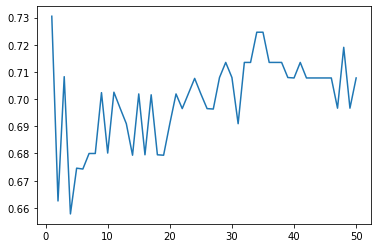

In [155]:
d1 = np.array(d1)
plt.plot(d1[:,0], d1[:,1])

In [156]:
answer = f'%d' % d1[d1[:,1].argmax(), 0]
print(answer)
with open('lab3_1.txt', 'w') as outfile:
    outfile.write(answer)

1


In [157]:
answer = f'{round(d1[:,1].max(), 2)}'
print(answer)
with open('lab3_2.txt', 'w') as outfile:
    outfile.write(answer)

0.73


In [131]:
X_tr = scale(X)

In [132]:
X_tr

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [158]:
d2 = []
for k in range(1, 51):
    neigh = KNN(n_neighbors=k)
    neigh.fit(X_tr, y)
    #print(neigh.predict(X_tr))
    sc = cross_val_score(estimator=neigh, X=X_tr, y=y, cv=kf).mean()
    d2.append([k, sc])
    #print('k = %d - score = %f' % (k, sc))

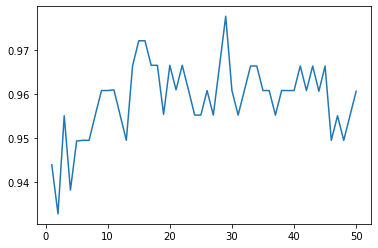

In [159]:
d2 = np.array(d2)
plt.plot(d2[:,0], d2[:,1])

In [160]:
answer = f'%d' % d2[d2[:,1].argmax(), 0]
print(answer)
with open('lab3_3.txt', 'w') as outfile:
    outfile.write(answer)

29


In [161]:
answer = f'{round(d2[:,1].max(), 2)}'
print(answer)
with open('lab3_4.txt', 'w') as outfile:
    outfile.write(answer)

0.98
